<a href="https://colab.research.google.com/github/kastrahl/Data-science/blob/main/da5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
from sklearn import datasets # to retrieve the iris Dataset
import pandas as pd # to load the dataframe
from sklearn.preprocessing import StandardScaler # to standardize the features
from sklearn.decomposition import PCA # to apply PCA
import seaborn as sns # to plot the heat maps


In [2]:
diab = datasets.load_diabetes()
#convert the dataset into a pandas data frame
df = pd.DataFrame(diab['data'], columns = diab['feature_names'])
#display the head (first 5 rows) og the dataset
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [10]:
newdf = df.drop(['s1','s2','s3','s4','s5'], axis = 1)
newdf.head()

,age,sex,bmi,bp,s6
0,0.038076,0.050680,0.061696,0.021872,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,-0.046641


In [11]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(newdf)) #scaling the data
scaled_data

,0,1,2,3,4
0,0.800500,1.065488,1.297088,0.459840,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553511,-1.938479
2,1.793307,1.065488,0.934533,-0.119218,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770658,-0.196823
4,0.113172,-0.938537,-0.764944,0.459840,-0.980568
...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256044,0.151508
438,-0.115937,1.065488,-0.334410,-1.422098,0.935254
439,0.876870,1.065488,-0.334410,0.363330,0.325674
440,-0.956004,-0.938537,0.821235,0.025547,-0.545154


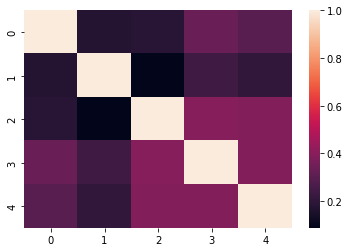

In [12]:
# without pca 
sns.heatmap(scaled_data.corr())

here there is high correlation in 5 vs 4 and 7 vs 5 and 8 and 7 

In [16]:
#Applying Principal Component Analysis we have taken n_components = 3, which means our final feature set will have 3 columns
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,1.296387,-0.389225,0.214380
1,-2.063626,-0.084440,-0.926623
2,1.152062,-0.823339,-0.764543
3,-1.675964,0.942085,1.032131
4,-0.841016,0.236001,-0.834084


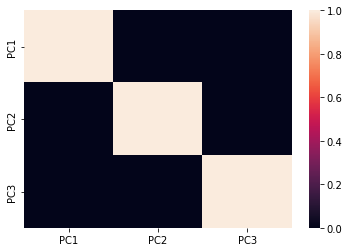

In [17]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())


thus no correlation in the left 3 columns 